<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [3]:
#data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data = pd.read_csv("dataset_part_2.csv") # Local loading

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

#data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
#X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X = pd.read_csv('dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

#X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

#X.shape
X.head(100)


,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Legs_True,Reused_False,Reused_True,GridFins_False,GridFins_True,FlightNumber,PayloadMass,Flights,Block,ReusedCount
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,6104.959412,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2.0,525.000000,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.0,677.000000,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,4.0,500.000000,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,5.0,3170.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,86.0,15400.000000,2.0,5.0,2.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,87.0,15400.000000,3.0,5.0,2.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,88.0,15400.000000,6.0,5.0,5.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,89.0,15400.000000,3.0,5.0,2.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [5]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

*As a matter of fact, the output of the .to_numpy() method can only be a numpy array*  
An equally valid route would be creating an actual pandas.Series by storing 

```python
Y = data['Class'].copy(deep = True)
```

The task is not clearly explained, at least not to me ...

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [6]:
# students get this 
transform = preprocessing.StandardScaler()

In [7]:
X = transform.fit_transform(X)
X

array([[-0.10599979, -0.10599979, -0.65465367, ..., -0.65391284,
        -1.57589457, -0.97344046],
       [-0.10599979, -0.10599979, -0.65465367, ..., -0.65391284,
        -1.57589457, -0.97344046],
       [-0.10599979, -0.10599979, -0.65465367, ..., -0.65391284,
        -1.57589457, -0.97344046],
       ...,
       [-0.10599979, -0.10599979, -0.65465367, ...,  3.49060516,
         0.94553674,  1.96648039],
       [-0.10599979, -0.10599979, -0.65465367, ...,  1.00389436,
         0.94553674,  0.20252788],
       [-0.10599979, -0.10599979, -0.65465367, ..., -0.65391284,
         0.94553674, -0.97344046]])

In [8]:
X.shape

(90, 83)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [9]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size=.2,random_state=2)

we can see we only have 18 test samples.


In [10]:
if isinstance(Y_test, np.ndarray):
    print(Y_test.shape)

(18,)


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
parameters ={
    'C':[0.01,0.009,0.1,1],
    'penalty':['l2',],
    'solver':['lbfgs']
}
# l1 lasso l2 ridge
lr=LogisticRegression()

In [12]:
logreg_cv = GridSearchCV(lr,param_grid=parameters,cv=10,)
logreg_cv.fit(X = X_train, y=Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.009, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [14]:
score = logreg_cv.score(X=X_test, y=Y_test)
print(f'In Test Sample {score = }')

In Test Sample score = 0.8333333333333334


Lets look at the confusion matrix:


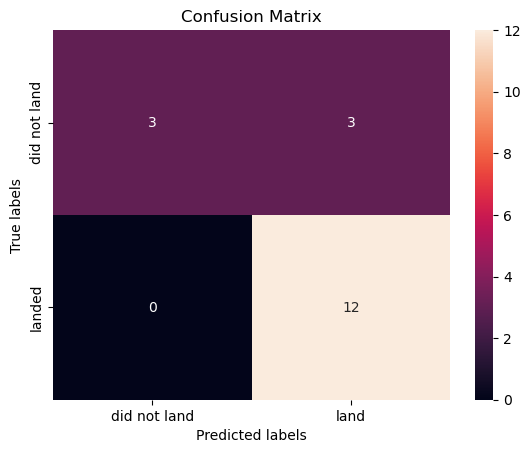

In [15]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
parameters = {
    'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)
}
svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv = 10)

In [17]:
svm_cv.fit(X=X_train, y = Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [18]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [19]:
print(f'Testing score on Test set : Score = {svm_cv.score(X=X_test, y = Y_test)}')


Testing score on Test set : Score = 0.8333333333333334


We can plot the confusion matrix


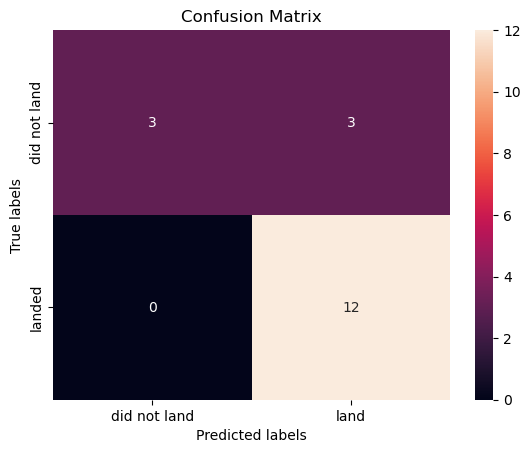

In [20]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters = {
     'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

In [22]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
#tree_cv.fit(X_train, Y_train)

In [23]:
tree_cv.fit(X_train, Y_train)

d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [25]:
print(f'Testing score for the tree method on the test set : Score = {tree_cv.score(X=X_test, y = Y_test)}')

Testing score for the tree method on the test set : Score = 0.7777777777777778


We can plot the confusion matrix


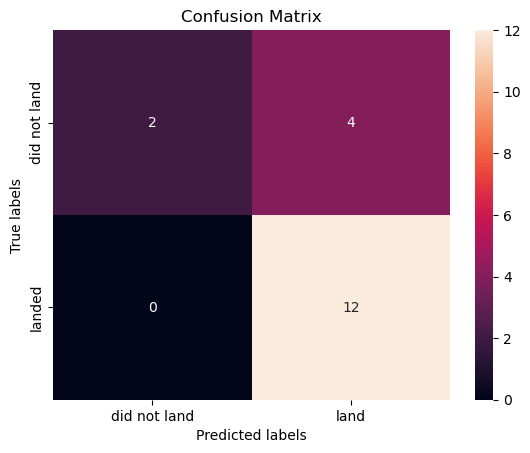

In [26]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters,cv = 10)

In [28]:
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [29]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
print(f'Testing score for the KNN method on the test set : Score = {knn_cv.score(X=X_test, y = Y_test)}')

Testing score for the KNN method on the test set : Score = 0.8333333333333334


We can plot the confusion matrix


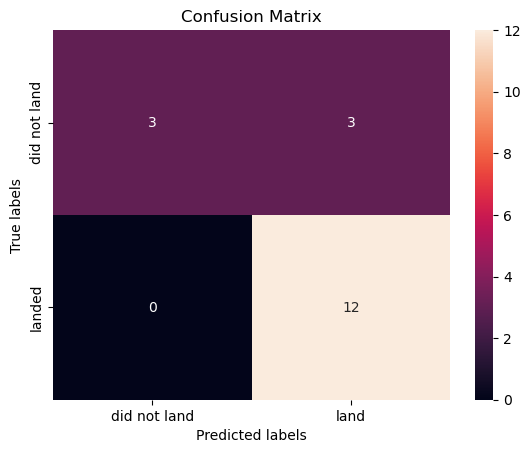

In [31]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


AS it stands, right now all of them appear to be performing somewhat equally, being the only exception the tree classifier that scores slightly worts than KNN, SVM and Logistinc regression.

Notice how the tree classifier incurs both in false negative and false positive predictions, whereas the rest only have a minnor problem of false positive predictions.

Maybe, the next steps are 

+ Increasing the grid search parameter space.
+ Changing the folding-cv number.
+ Maybe trainning on a lower percentage of the total data matrix, to see the resiliance of the algorithms and test their capacity to generalize model predictions.

The main problem I find with this dataset is the correlation *dimensionality* v *samples*.  
The sample space is 90, whereas the dimensionality is 83 ...

ONe might think that such a high dimensional problem would require a larger dataset for optimal fitting and satisfactory results ...

**To visualize them better, we can plot all the confusion matrices all together**

In [32]:
# Small modification to the plotting function provided ...

def plot_confusion_matrix_in_ax(y,y_predict, ax : plt.Axes | None = None, title : str | None = ''):
    "this function plots the confusion matrix in a given axis ax"
    cm = confusion_matrix(y, y_predict)
    if not ax:
        ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    if not title:
        title = 'Confusion Matrix'
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    return ax

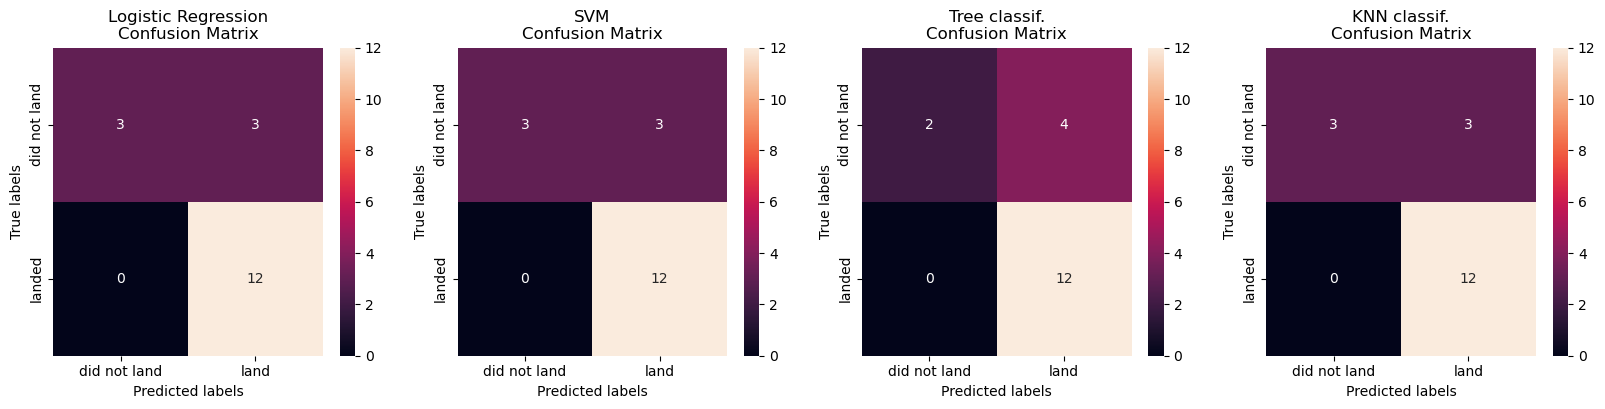

In [33]:
# Now, all toguether would be ...
title_keys = ['Logistic Regression','SVM', 'Tree classif.', 'KNN classif.']
models = [logreg_cv,svm_cv,tree_cv, knn_cv] # Alredy fitted models

fig, axes = plt.subplots(nrows=1,ncols=4,squeeze=False, figsize = (20,4))
for i,ax in enumerate(axes.flatten()):
    title = f'{title_keys[i]}\nConfusion Matrix'
    plot_confusion_matrix_in_ax(Y_test,models[i].predict(X_test) , ax, title)


### Improvements on the model

As it is right now, it is very difficult to **select a winner** among the suggested algorithms.  
Nonetheless, the clear looser is the DecisionTree.

The first thing that one may try, is to modify the actual training-testing set. If a different partition is chosen, does it affects substantially the outcome?

Another thing to consider is the dimmesionality of the set, specially comaped to the size of the sample space (90 samples, and 83 dimensions / features as it is, clearly not balanced).

Let's recall some of the relations observed in the EDA lab ...

**Loading datasets again, to avoid all the preprocessing done**

In [34]:
data = pd.read_csv("dataset_part_2.csv") # Local loading
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [35]:
dX = pd.read_csv('dataset_part_3.csv')
dX.head(100)

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Legs_True,Reused_False,Reused_True,GridFins_False,GridFins_True,FlightNumber,PayloadMass,Flights,Block,ReusedCount
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,6104.959412,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2.0,525.000000,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.0,677.000000,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,4.0,500.000000,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,5.0,3170.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,86.0,15400.000000,2.0,5.0,2.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,87.0,15400.000000,3.0,5.0,2.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,88.0,15400.000000,6.0,5.0,5.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,89.0,15400.000000,3.0,5.0,2.0


*Some visual relations*

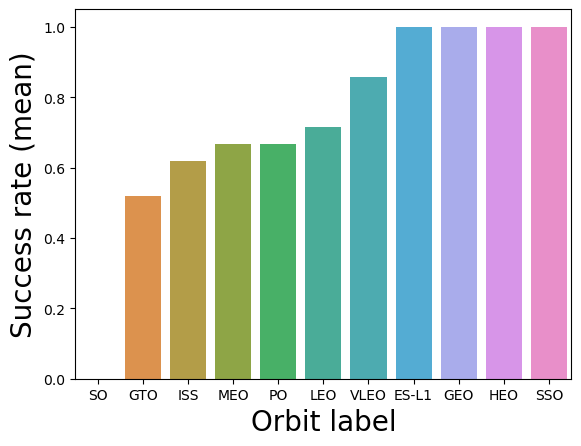

In [36]:
groupBy_var = 'Orbit'
computed_data = data.groupby(groupBy_var, axis=0)['Class'].mean().reset_index()
computed_data.sort_values('Class',inplace=True)

sns.barplot(
    x='Orbit',
    y = 'Class',
    data = computed_data.groupby(groupBy_var)['Class'].mean().reset_index(),
    order = computed_data['Orbit'].to_list(),
)
plt.xlabel('Orbit label',fontsize=20)
plt.ylabel("Success rate (mean)",fontsize=20)
plt.show()

So, orbits may be a valid dimenssion. But, we have them one-hot-encoded ...  

Notice, that apart from the success rate, we should also condider the number of datapoints in a given orbit.

As it is ...

In [37]:
data['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

Some of the dimensions are extraordinarly sparse. SO, GEO, HEO .... only have one flight record. And so, the success of a single datapoint could affect greatly what our models predict for tha orbit.

As such, I wouldn't recommend these dimensions as they are ...

In [38]:
colnames = [names for names in dX.columns if 'Orbit' in names]
colnames

['Orbit_ES-L1',
 'Orbit_GEO',
 'Orbit_GTO',
 'Orbit_HEO',
 'Orbit_ISS',
 'Orbit_LEO',
 'Orbit_MEO',
 'Orbit_PO',
 'Orbit_SO',
 'Orbit_SSO',
 'Orbit_VLEO']

And now we can drop those dimensions ...

In [39]:
dX.drop(colnames,axis = 1, inplace=True)
dX.head(100)

,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,...,Legs_True,Reused_False,Reused_True,GridFins_False,GridFins_True,FlightNumber,PayloadMass,Flights,Block,ReusedCount
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,6104.959412,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,2.0,525.000000,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.0,677.000000,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,4.0,500.000000,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,5.0,3170.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,86.0,15400.000000,2.0,5.0,2.0
86,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,87.0,15400.000000,3.0,5.0,2.0
87,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,88.0,15400.000000,6.0,5.0,5.0
88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,89.0,15400.000000,3.0,5.0,2.0


**LaunchSite** has been investigated as well in previous labs, and seems to be a valid feature to be taken into account. We can keep it. 

By contrast, we haven't considered yet where the boosters land ... LandingPad_* 

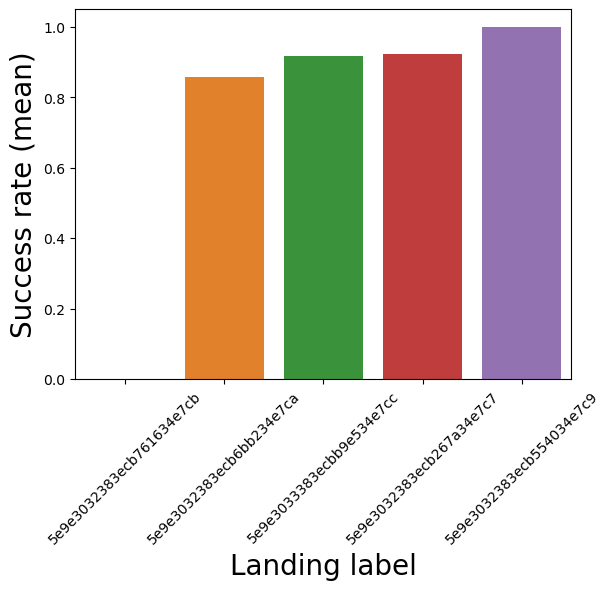

In [40]:
groupBy_var = 'LandingPad'
computed_data = data.groupby(groupBy_var, axis=0)['Class'].mean().reset_index()
computed_data.sort_values('Class',inplace=True)

sns.barplot(
    x=groupBy_var,
    y = 'Class',
    data = computed_data.groupby(groupBy_var)['Class'].mean().reset_index(),
    order = computed_data[groupBy_var].to_list(),
)
plt.xlabel('Landing label',fontsize=20)
plt.ylabel("Success rate (mean)",fontsize=20)
plt.xticks(rotation = 45)
plt.show()

In [41]:
data['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

A little less sparse that the orbit ... but still lacking a lot of values on two of the pads. 

Even worse, the 5e9e3032383ecb761634e7cb with only 2 data points presents a success rate of 0%, which will surely affect the outcome of the model (each time it encounters a 1 in this dimension in the one hot encoding, it may predict a failure ...)

So we may later choose to drop it.

Right now, let us keep it, just in case ....

Also, notice the extreme sparsity of the Serial dimension ...

In [42]:
serial_cols = [col for col in dX.columns if 'Serial' in col]
print(len(serial_cols))

53


Or, from the original dataset ....

In [43]:
data['Serial'].value_counts()

B1049    6
B1051    5
B1059    4
B1056    4
B1048    4
B1046    4
B1060    3
B1058    3
B1047    3
B1031    2
B1036    2
B1021    2
B1039    2
B1035    2
B1041    2
B1029    2
B1040    2
B1045    2
B1032    2
B1042    1
B1043    1
B1038    1
B1044    1
B1037    1
B1050    1
B1054    1
B1034    1
B0003    1
B1030    1
B1013    1
B0007    1
B1003    1
B1004    1
B1005    1
B1006    1
B1007    1
B1008    1
B1011    1
B1010    1
B1012    1
B1015    1
B0005    1
B1016    1
B1018    1
B1019    1
B1017    1
B1020    1
B1022    1
B1023    1
B1025    1
B1026    1
B1028    1
B1062    1
Name: Serial, dtype: int64

This is clearly a bad dimension ....

In [44]:
data['Serial'].value_counts()[data['Serial'].value_counts() == 1].size

34

*34 of the 53 one-hot-encoded **serial** columns are single occurences*. Let us drop this dimensions ...

In [45]:
colnames = [col for col in dX if 'Serial' in col]

dX.drop(colnames, axis = 1,inplace=True)
dX.head(100)

,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Legs_False,Legs_True,Reused_False,Reused_True,GridFins_False,GridFins_True,FlightNumber,PayloadMass,Flights,Block,ReusedCount
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,6104.959412,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,525.000000,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,677.000000,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,500.000000,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3170.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,86.0,15400.000000,2.0,5.0,2.0
86,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,87.0,15400.000000,3.0,5.0,2.0
87,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,88.0,15400.000000,6.0,5.0,5.0
88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,89.0,15400.000000,3.0,5.0,2.0


**Gridfins is another interesting feature**

In [46]:
data.groupby('GridFins')['Class'].value_counts()

GridFins  Class
False     0        18
          1         2
True      1        58
          0        12
Name: Class, dtype: int64

We can see that without deployment, they almost always end up crashing, but also sometimes when deployed. Not a bad thing .... we can check how this relates to other variables.

**Block**, as Series, does not carry much info. Some fail, some don't, but we cannot see a clear correlation other than improvement on the actual process of the rocket itself, as time progresses ... (Block 1 we clearly more prone to failure) ...

<Figure size 640x480 with 0 Axes>

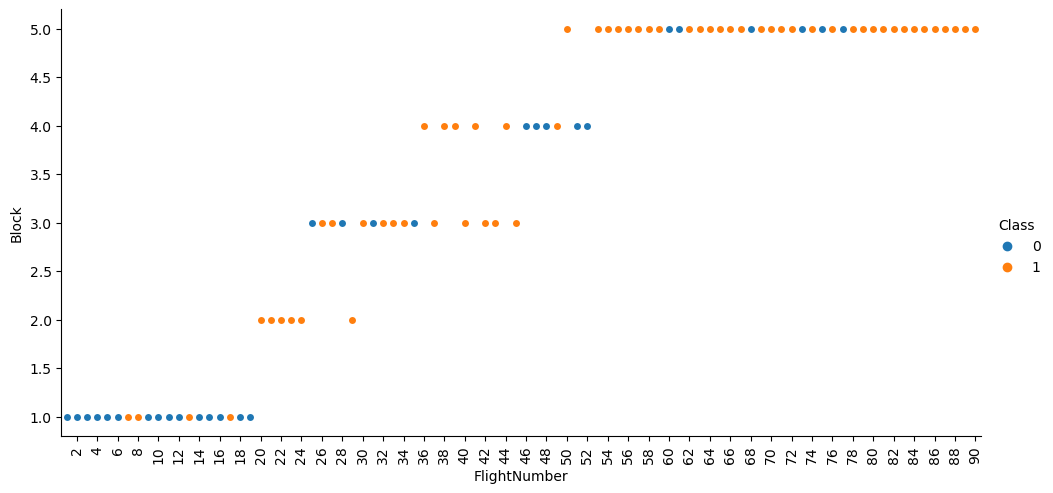

In [47]:
plt.figure()
sns.catplot(data, x = 'FlightNumber', y = 'Block', hue = 'Class', aspect = 2)
plt.xticks(np.arange(1,data.shape[0],2),rotation = 90)
plt.show()

In [48]:
var_to_drop = 'Block'
dX.drop(var_to_drop, axis = 1, inplace=True)
dX.head(10)

,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Legs_False,Legs_True,Reused_False,Reused_True,GridFins_False,GridFins_True,FlightNumber,PayloadMass,Flights,ReusedCount
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,6104.959412,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,525.000000,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,677.000000,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,500.000000,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3170.000000,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6.0,3325.000000,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0,2296.000000,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,8.0,1316.000000,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9.0,4535.000000,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,4428.000000,1.0,0.0


**Legs** seem to be another critical mission parameter. Whenever legs are not deployed ... most likely the rocket will fail to land. So, let's keep it. 

Nonetheless, notice that sometimes fails even deploying legs... let's see if that is conditioned by other variables and how it relates in the model ...

In [49]:
data.groupby('Legs')['Class'].value_counts()

Legs   Class
False  0        18
       1         1
True   1        59
       0        12
Name: Class, dtype: int64

**Prenormalization** and label extraction

In [50]:
prenorm = preprocessing.StandardScaler()

X = prenorm.fit_transform(dX)

Y = data['Class'].to_numpy()

In [51]:
print(f'X shape = {X.shape}\nY shape = {Y.shape}')

X shape = (90, 18)
Y shape = (90,)


In [52]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size=.2,random_state=0)

**Logistic Regression**

In [53]:
parameters ={
    'C':[0.01,0.009,0.1,1],
    'penalty':['l2',],
    'solver':['lbfgs']
}
# l1 lasso l2 ridge
lr=LogisticRegression()

In [54]:
logreg_cv = GridSearchCV(lr,param_grid=parameters,cv=10,)
logreg_cv.fit(X = X_train, y=Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.009, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

**From here on, let's keep in sample and out of sample accuracy scores, to visualize this model parameters at the end**

In [55]:
insample_acc = [] # In sample accuracies
outsample_acc = [] # Out of sample accuracies
algo = []  # To know the ordering by algorithm name

In [56]:
insample_acc.append(logreg_cv.best_score_)
algo.append('LogisticRegression')

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8607142857142858


In [57]:
score = logreg_cv.score(X=X_test, y=Y_test)
outsample_acc.append(score)
print(f'In Test Sample {score = }')

In Test Sample score = 0.8333333333333334


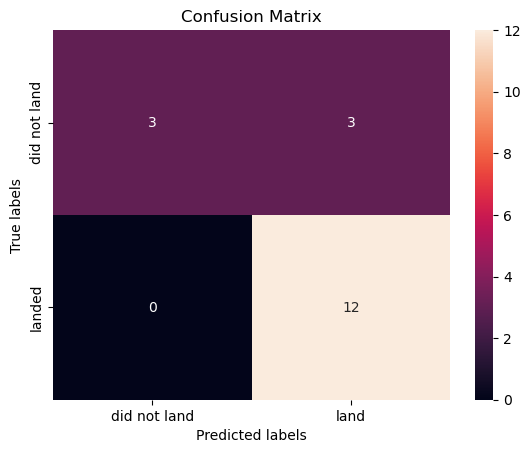

In [58]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Very much the same ... hummm ....

**SVM**

In [59]:
parameters = {
    'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv = 10)

In [60]:
svm_cv.fit(X=X_train, y = Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [61]:
insample_acc.append(svm_cv.best_score_)
algo.append('SVM')
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'poly'}
accuracy : 0.875


In [62]:
score = svm_cv.score(X=X_test, y = Y_test)
outsample_acc.append(score)
print(f'Testing score on Test set : Score = {score}')


Testing score on Test set : Score = 0.8888888888888888


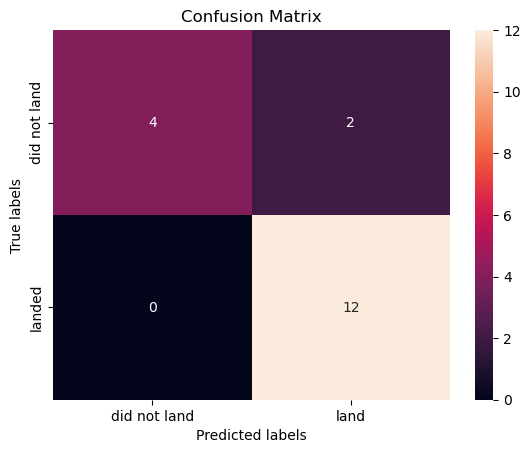

In [63]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**Decission Trees**


In [64]:
parameters = {
     'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

In [65]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
#tree_cv.fit(X_train, Y_train)

In [66]:
tree_cv.fit(X_train, Y_train)

d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Anaconda3\envs\dash-app-tutorial\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [67]:
insample_acc.append(tree_cv.best_score_)
algo.append('DecisionTree')
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8910714285714286


In [68]:
score = tree_cv.score(X=X_test, y = Y_test)
outsample_acc.append(score)
print(f'Testing score for the tree method on the test set : Score = {score}')

Testing score for the tree method on the test set : Score = 0.7777777777777778


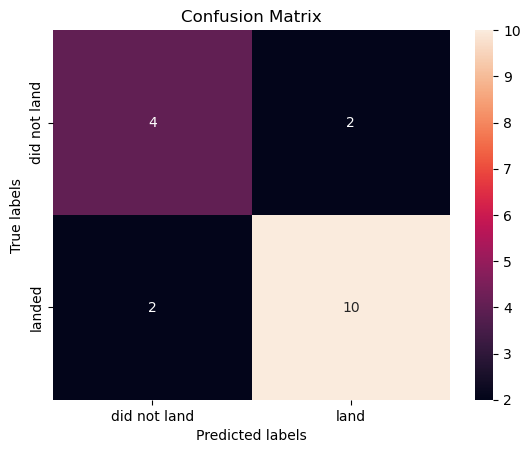

In [72]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**KNN**

In [73]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters,cv = 10)

In [74]:
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [75]:
insample_acc.append(knn_cv.best_score_)
algo.append('KNN')
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.85


In [76]:
score = knn_cv.score(X=X_test, y = Y_test)
outsample_acc.append(score)
print(f'Testing score for the KNN method on the test set : Score = {score}')

Testing score for the KNN method on the test set : Score = 0.8333333333333334


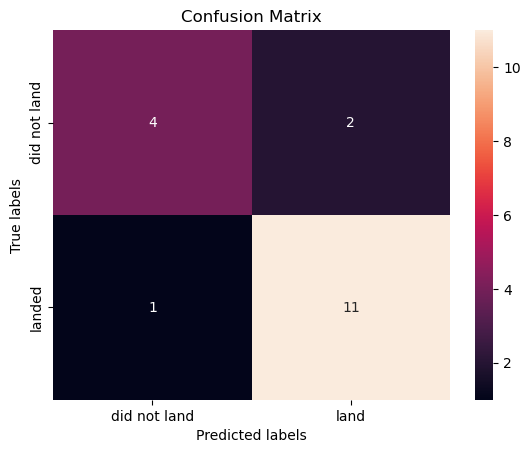

In [77]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

And so, every algorithm at once ...

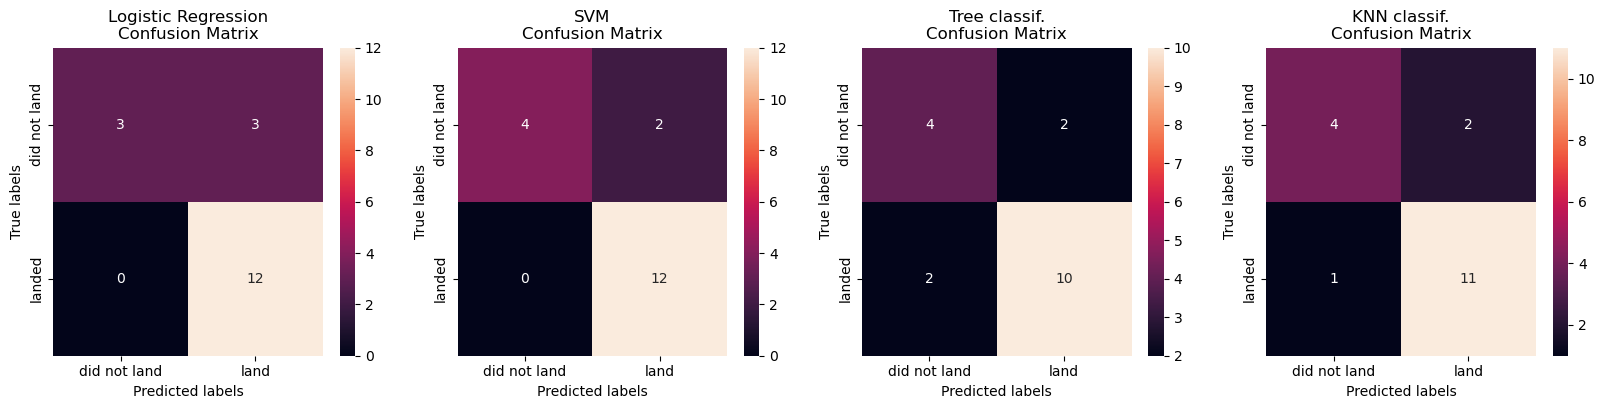

In [78]:
# Now, all toguether would be ...
title_keys = ['Logistic Regression','SVM', 'Tree classif.', 'KNN classif.']
models = [logreg_cv,svm_cv,tree_cv, knn_cv] # Alredy fitted models

fig, axes = plt.subplots(nrows=1,ncols=4,squeeze=False, figsize = (20,4))
for i,ax in enumerate(axes.flatten()):
    title = f'{title_keys[i]}\nConfusion Matrix'
    plot_confusion_matrix_in_ax(Y_test,models[i].predict(X_test) , ax, title)


And a bar plot for the insample and outsample scores.

(0.6, 1.0)

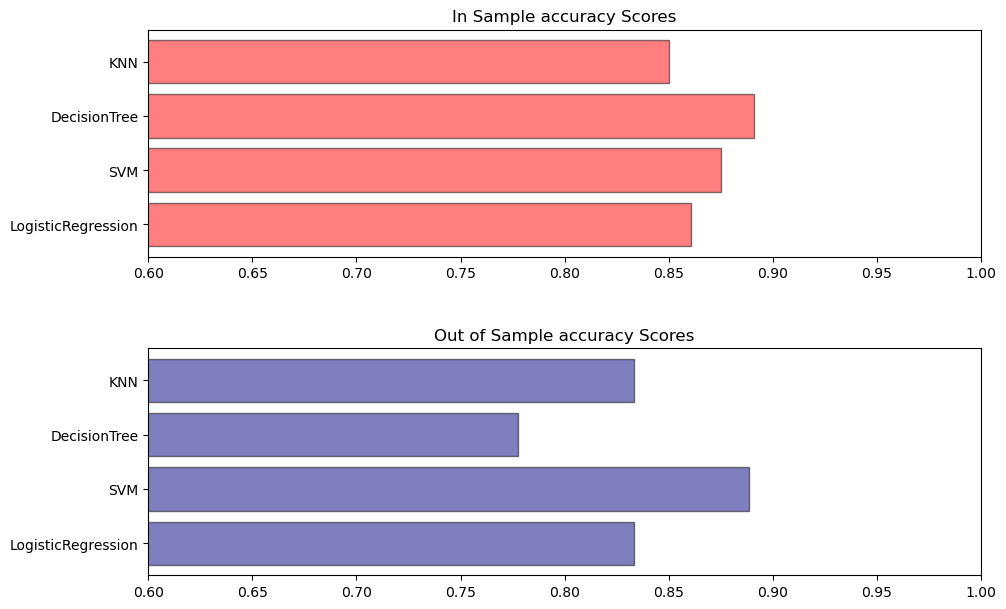

In [96]:
figure, axes  = plt.subplots(nrows=2, ncols=1, figsize = (10, 7))
figure.tight_layout(pad = 4.5)

ax = axes[0]
ax.barh(np.arange(len(algo)), insample_acc, align='center', facecolor = 'red', alpha = .5, edgecolor = 'k')
ax.set_yticks(np.arange(len(algo)), labels= algo)
ax.set_title('In Sample accuracy Scores')
ax.set_xlim((.6, 1))

ax2 = axes[1]
ax2.barh(np.arange(len(algo)), outsample_acc, align='center', facecolor = 'navy', alpha = .5, edgecolor = 'k')
ax2.set_yticks(np.arange(len(algo)), labels= algo)
ax2.set_title('Out of Sample accuracy Scores')
ax2.set_xlim((.6, 1))



Or in another visualization

C:\Users\javio\AppData\Local\Temp\ipykernel_15592\4289993182.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


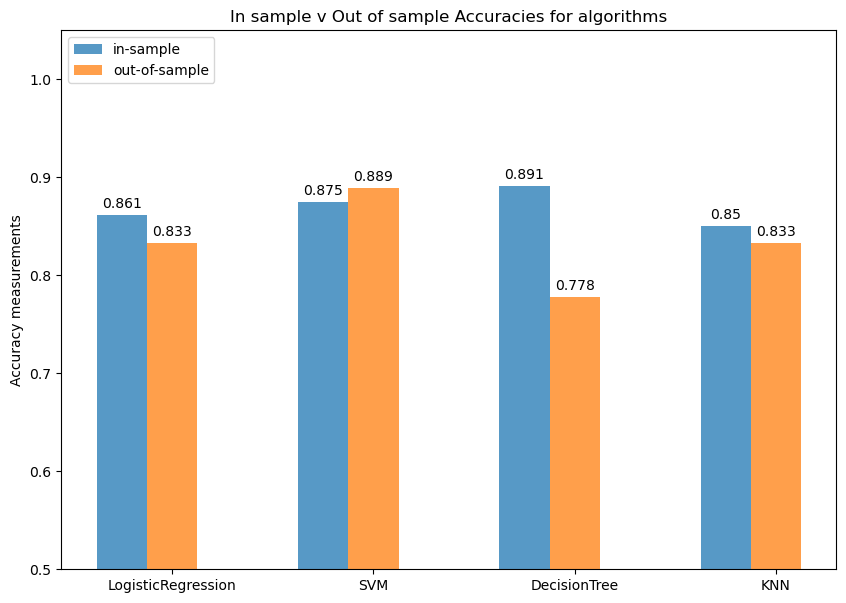

In [106]:
accuracies = {
    'in-sample' : [round(el,3) for el in insample_acc],
    'out-of-sample' : [round(el,3) for el in outsample_acc]    
}

x = np.arange(len(algo))
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,7))

bottom = np.zeros(4)

for attribute, measurement in accuracies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, alpha = .75)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy measurements')
ax.set_title('In sample v Out of sample Accuracies for algorithms')
ax.set_xticks(x + width, algo)
ax.legend(loc='upper left')
ax.set_ylim(0.5, 1.05)

fig.show()

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
